# Let's build this Neural Network for handswritten digits from 0 to 9:

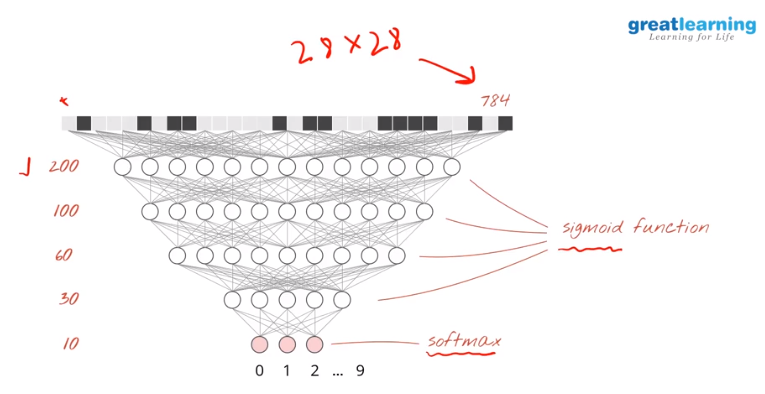

In [16]:
# Load TensorFlow and reset any previous graph in memory
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [17]:
# Collect Data

In [18]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

In [19]:
trainX.shape

(60000, 28, 28)

In [20]:
# This is the first output label. Checking that it is in fact an int number.
trainY[0]

5

In [21]:
testX.shape

(10000, 28, 28)

In [22]:
# We need at the output 10 possible values, so we need to convert output label to multiple values

In [23]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [24]:
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Build the Graph

In [37]:
tf.keras.backend.clear_session()
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D --> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add hidden and output layers. Try first with "sigmoid" and then with "relu".

In [38]:
# Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [39]:
# Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# We can try also applying a "Dropout" of 30 or 40%
# model.add(tf.keras.layers.Dropout(0.3))

In [40]:
# Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

# We can try also applying a "Dropout" of 30 or 40%
# model.add(tf.keras.layers.Dropout(0.3))

In [41]:
# Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [42]:
# Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [46]:
# Initialize optimizer ( Try first with "adam" then with "sgd")
tf.keras.optimizers.Adam(lr=0.003, decay=0.001)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Review the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [48]:
# Train the model
model.fit(trainX, trainY,
         validation_data=(testX, testY),
         epochs=5,
         batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0717 - acc: 0.9787 - val_loss: 0.1218 - val_acc: 0.9678
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0608 - acc: 0.9817 - val_loss: 0.1294 - val_acc: 0.9672
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0551 - acc: 0.9830 - val_loss: 0.1286 - val_acc: 0.9668
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0512 - acc: 0.9840 - val_loss: 0.1327 - val_acc: 0.9679
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0461 - acc: 0.9853 - val_loss: 0.1472 - val_acc: 0.9649
